In [1]:
#%tensorflow_version 1.x
import tensorflow as tf
import locale
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import os
import time
import locale

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dat/1966.csv')
#df = df.append(df2,ignore_index=True, sort=False)
dupcounter = 0;
for x in range(1967, 2019):
  
  df2 = pd.read_csv('dat/' + str(x) + '.csv')
  #print(csv)
  for y in range(0, math.floor(dupcounter)):
    df = pd.concat([df, df2])
  #print(df)
  dupcounter += .1
print(df)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


     IfWeekend  Unnamed: 0  ... win_pitcher  win_total
0            0           0  ...        Nola          0
1            1           1  ...      Morgan          0
2            1           2  ...     Arrieta          0
3            0           3  ...     Parsons          1
4            0           4  ...     Jackson          2
..         ...         ...  ...         ...        ...
155          0         157  ...       Duffy         96
156          0         158  ...     Jackson         97
157          1         159  ...     Stroman         97
158          1         160  ...        Matz         97
159          1         161  ...       Mazza         97

[17446 rows x 32 columns]


In [3]:
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
wlist = []
llist = []
wllist = []
alist = []
deletors = []
dn = []
for x in df['record']:
  split = x.split('//')
  wlist.append(float(split[0]))
  llist.append(float(split[1]))
  wllist.append(float(split[0])/float(split[1]))
for x in df['day_night_raw']:
  if x == 'D':
    dn.append(1)
  elif x == 'N':
    dn.append(0)

df['W'] = wlist
df['L'] = llist
counter = 0;
for d in df['attendance']:
  if np.isnan(d):
    deletors.append(counter)
    #df.drop(df.index[counter], inplace=True)

  alist.append(d)
  counter+=1
df.drop
print(df['attendance'])
print(wllist)

0      0.842711
1      0.845136
2      0.784741
3      0.794254
4      0.708712
         ...   
155    0.316246
156    0.320851
157    0.497716
158    0.610396
159    0.597377
Name: attendance, Length: 17446, dtype: float64
[0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 1.3333333333333333, 1.0, 1.25, 1.5, 1.75, 1.4, 1.1666666666666667, 1.3333333333333333, 1.5, 1.2857142857142858, 1.125, 1.0, 1.1, 1.0, 1.0909090909090908, 1.0, 0.9230769230769231, 0.8571428571428571, 0.9285714285714286, 1.0, 0.9333333333333333, 1.0, 0.9375, 1.0, 1.0625, 1.125, 1.0588235294117647, 1.0, 0.9473684210526315, 0.9, 0.95, 1.0, 1.05, 1.0, 1.0476190476190477, 1.0952380952380953, 1.1428571428571428, 1.1904761904761905, 1.1363636363636365, 1.1818181818181819, 1.1304347826086956, 1.173913043478261, 1.2173913043478262, 1.2608695652173914, 1.2083333333333333, 1.25, 1.2, 1.1538461538461537, 1.1111111111111112, 1.1481481481481481, 1.1851851851851851, 1.2222222222222223, 1.1785714285714286, 1.13793103448275

In [4]:
dff = pd.DataFrame()
dff.insert(0, 'attendance', alist, True)
dff.insert(1, 'W', wlist, True)
dff.insert(2, 'L', llist, True)
#dff.insert(3, 'W/L', wllist, True)
dff.insert(3, 'Day/Night', dn, True)
dff.insert(4, 'Weekend', df['IfWeekend'].tolist(), True)
dff.insert(5, 'Home', df['home'].tolist(), True)
dff.insert(6, 'Streak', df['streak'].tolist(), True)
dff.insert(7, 'Behind', df['games_behind'].tolist(), True)
dff.insert(8, 'Rain', df['rain'].tolist(), True)

print(dff)
arr = dff.to_numpy()
arr = np.delete(arr, deletors, axis=0)
#for x in range(0, 170):
#  print(type(arr[x, 2]))
np.savetxt('outer.csv', arr, delimiter=',')
#for x in wlist:
#  print(type(x))

       attendance     W     L  Day/Night  Weekend  Home  Streak  Behind  Rain
0        0.842711   0.0   1.0          1        0     0      -1     0.0   0.0
1        0.845136   0.0   2.0          1        1     0      -2     0.0   0.0
2        0.784741   0.0   3.0          0        1     0      -3     0.0   0.0
3        0.794254   1.0   3.0          0        0     1       1     5.0   0.0
4        0.708712   2.0   3.0          0        0     1       2     5.0   0.0
...           ...   ...   ...        ...      ...   ...     ...     ...   ...
17441    0.316246  96.0  62.0          0        0     0      -2     7.5   0.0
17442    0.320851  97.0  62.0          0        0     0       1     7.5   0.0
17443    0.497716  97.0  63.0          0        1     0      -1     6.0   0.0
17444    0.610396  97.0  64.0          0        1     0      -2     5.0   0.0
17445    0.597377  97.0  65.0          1        1     0      -3     4.0   3.1

[17446 rows x 9 columns]


In [5]:
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import losses
from keras import optimizers

adam = optimizers.Adam()
model.compile(loss="mse", optimizer=adam,  metrics=['mse'])
#x = arr[:, 0:2]
#y = arr[:, 2]
#model.fit(x, y, epochs=3, batch_size=16,verbose=1)

In [7]:


x = arr[:, 1:8]
y = arr[:, 0]

def normalize(x):
  mx = max(x)
  return x / mx

seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

y = normalize(y)
print(x)
print(y)
history = model.fit(x, y, epochs=50, batch_size=160,verbose=1)
#print(model.predict(x, batch_size=16))
dff.to_csv('out.csv')


[[ 0.  1.  1. ...  0. -1.  0.]
 [ 0.  2.  1. ...  0. -2.  0.]
 [ 0.  3.  0. ...  0. -3.  0.]
 ...
 [97. 63.  0. ...  0. -1.  6.]
 [97. 64.  0. ...  0. -2.  5.]
 [97. 65.  1. ...  0. -3.  4.]]
[0.82799263 0.83037593 0.77103543 ... 0.48902378 0.5997356  0.58694397]



Epoch 1/50





17443/17443 [==============================] - 1s 40us/step - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 2/50
17443/17443 [==============================] - 0s 9us/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 3/50
17443/17443 [==============================] - 0s 9us/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 4/50
17443/17443 [==============================] - 0s 9us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 5/50
17443/17443 [==============================] - 0s 8us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 6/50
17443/17443 [==============================] - 0s 9us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 7/50
17443/17443 [===================

In [8]:
weights, biases = model.layers[0].get_weights()
print(weights)
print()
print(biases)

[[-2.09651962e-01 -7.74559304e-02  2.45561317e-01  1.47309020e-01
  -2.73381382e-01  1.18534960e-01  9.53043103e-02  2.52727062e-01
   2.38802526e-02  1.63335040e-01 -1.77601129e-01 -1.07602388e-01
  -1.98323667e-01 -1.64558053e-01 -1.19585931e-01 -1.85483143e-01
  -2.30782777e-01  4.62976210e-02 -2.26645947e-01  4.87649888e-02
   1.96153522e-02 -2.49627843e-01 -8.55552405e-02  7.24196881e-02
   5.22778220e-02  1.11982092e-01  1.69375986e-02  6.42809793e-02
   2.18597040e-01 -1.81570411e-01  1.19796157e-01 -2.27116510e-01
   1.49427086e-01 -1.02278896e-01  1.87358707e-02 -1.84906840e-01
  -7.90860727e-02 -2.29696976e-03  2.02880979e-01 -2.83629537e-01
  -3.29699308e-01  2.03603700e-01 -9.87750739e-02 -2.96628922e-01
   6.80755600e-02 -2.75335282e-01  1.96524560e-01 -5.57332113e-02
   2.26686388e-01  2.59558052e-01  1.18534245e-01  3.40735912e-02
   1.35973990e-01 -9.98483300e-02 -1.42802060e-01  5.87863661e-02
   2.68266171e-01 -1.16176009e-02 -6.78988770e-02 -8.79045576e-02
  -1.14037

In [9]:
_, accuracy = model.evaluate(x, y)
print(accuracy)
a = np.array([[5, 9], [2, 7]])
#print(a)
#print(np.transpose(a))
#model.predict(a)

17443/17443 [==============================] - 0s 19us/step
0.004910001710054269


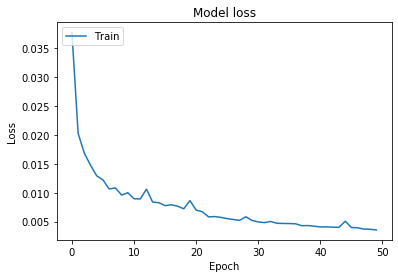

In [10]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.ylim(.01,)
plt.savefig('plot.jpg')
plt.show()


In [0]:
df = pd.read_csv('in.csv')
wlist = []
llist = []
wllist = []
alist = []
deletors = []
dn = []
for x in df['record']:
  split = x.split('//')
  wlist.append(float(split[0]))
  llist.append(float(split[1]))
  wllist.append(float(split[0])/float(split[1]))
for x in df['day_night_raw']:
  if x == 'D':
    dn.append(1)
  elif x == 'N':
    dn.append(0)

df['W'] = wlist
df['L'] = llist
counter = 0;
for d in df['attendance']:
  if np.isnan(d):
    deletors.append(counter)
    #df.drop(df.index[counter], inplace=True)

  alist.append(d)
  counter+=1


dff = pd.DataFrame()
dff.insert(0, 'attendance', alist, True)
dff.insert(1, 'W', wlist, True)
dff.insert(2, 'L', llist, True)
#dff.insert(3, 'W/L', wllist, True)
dff.insert(3, 'Day/Night', dn, True)
dff.insert(4, 'Weekend', df['IfWeekend'].tolist(), True)
dff.insert(5, 'Home', df['home'].tolist(), True)
dff.insert(6, 'Streak', df['streak'].tolist(), True)
dff.insert(7, 'Behind', df['games_behind'].tolist(), True)
dff.insert(8, 'Rain', df['rain'].tolist(), True)
arr = dff.to_numpy()
arr = np.delete(arr, deletors, axis=0)
arrout = model.predict(arr[:,1:8])
np.savetxt('outer.csv', arrout)